In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

# Wyświetlenie surowych danych EMG z pliku C3D

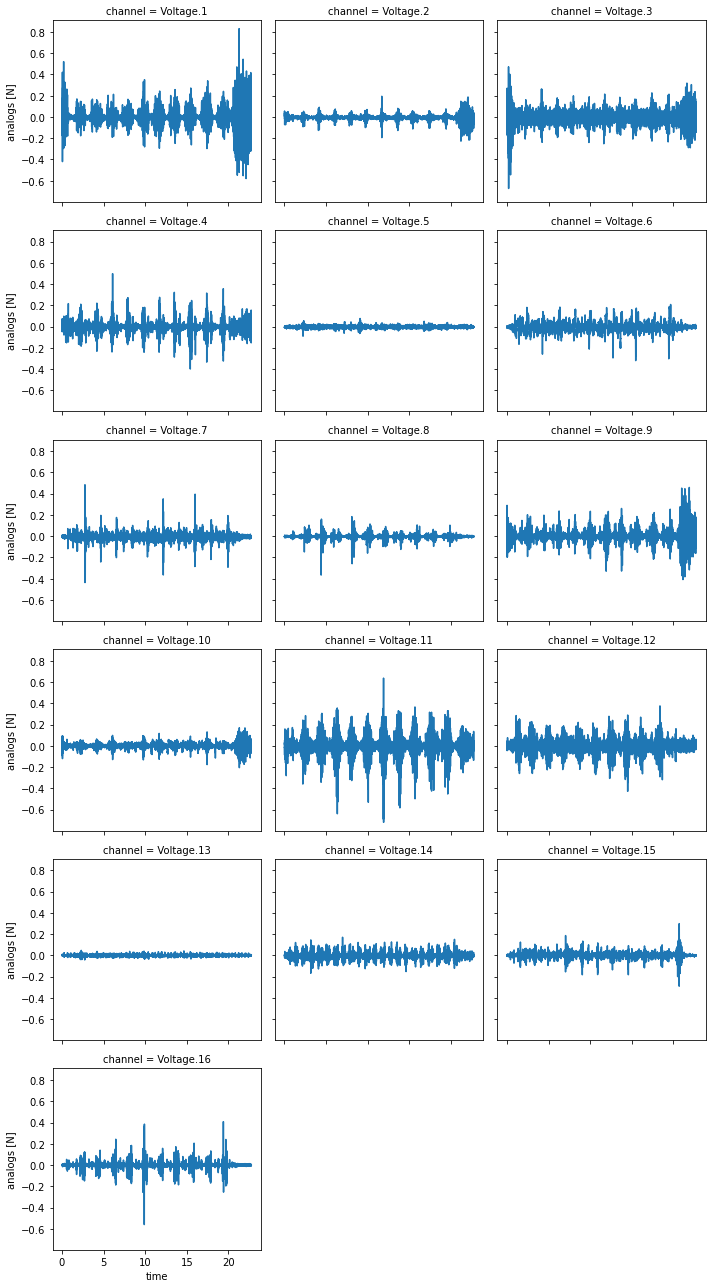

In [18]:
from pyomeca import Analogs

data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-07-B0448-S01-E02-T02.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]


emg = Analogs.from_c3d(data_path, usecols=muscles)
emg.plot(x="time", col="channel", col_wrap=3)

# Obróbka danych EMG

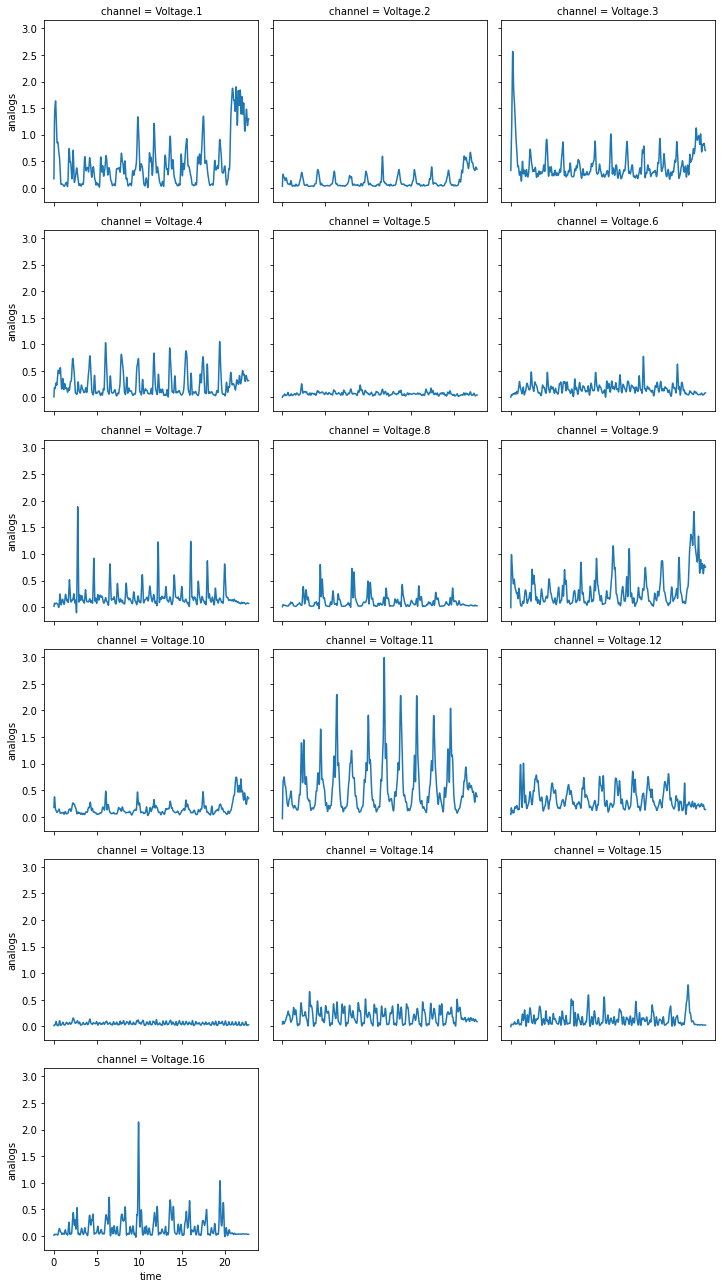

In [19]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(8)
)

emg_processed.plot(x="time", col="channel", col_wrap=3)

# Wyświetlenie danych z nazwami mięśni

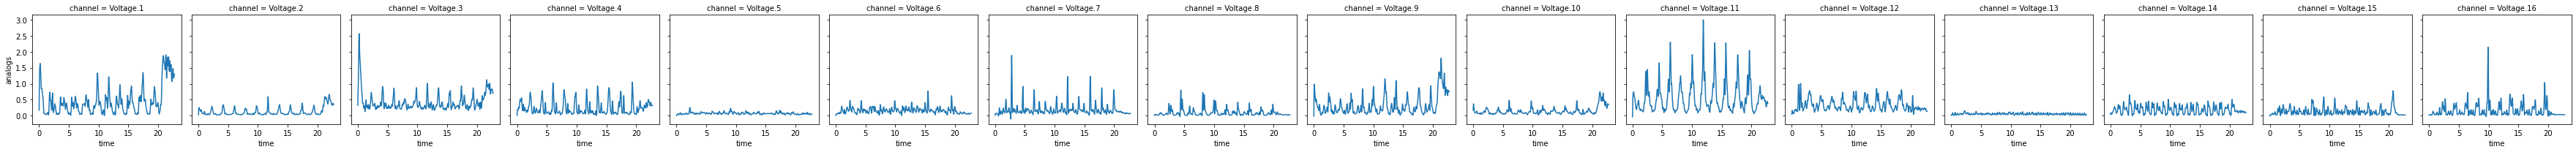

In [20]:
emg_processed.plot(col="channel")

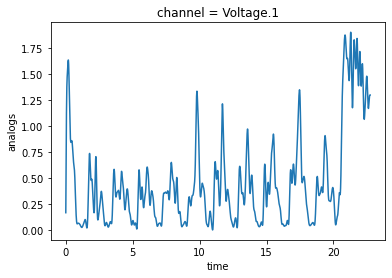

In [21]:
emg_processed[0].plot()

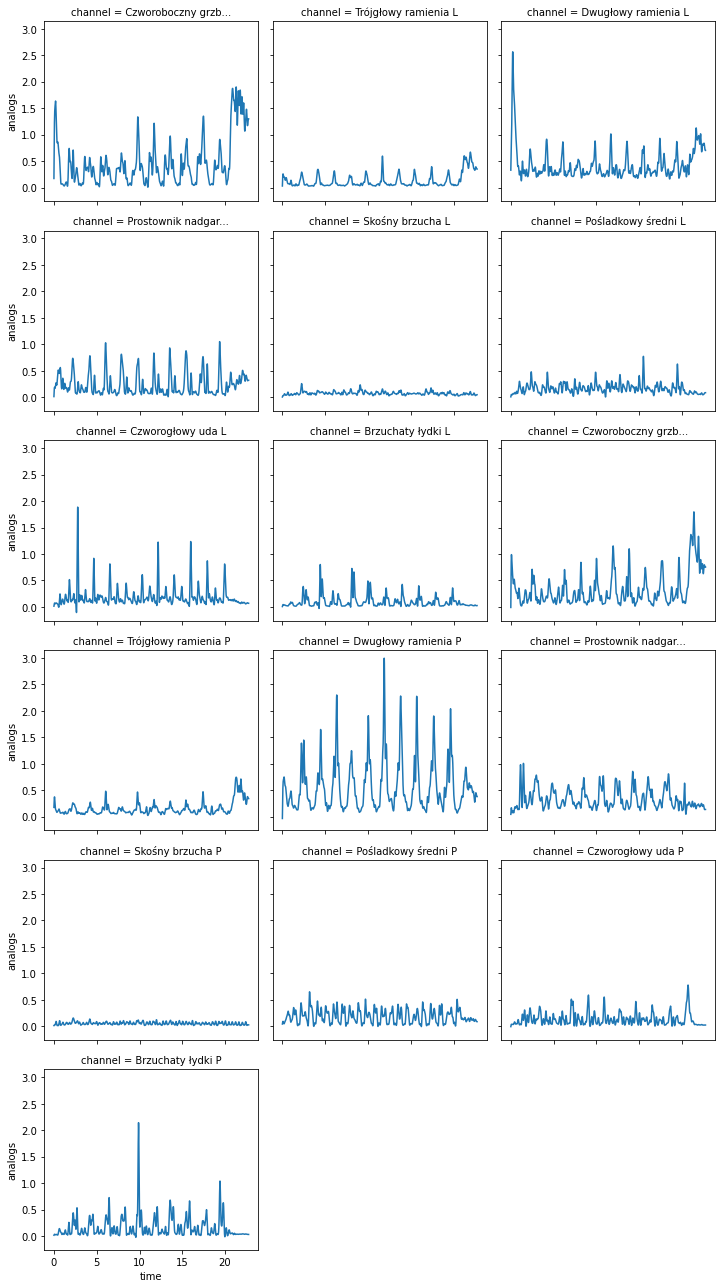

In [22]:
emg_processed.indexes
emg_processed['channel'] = muscles_names
emg_processed.plot(x="time", col="channel", col_wrap=3)

In [23]:
from scipy import stats

In [24]:
emg_2 = stats.zscore(emg_processed[0])

# Wykresy wczytywane pojedyńczo

(1, 22745)


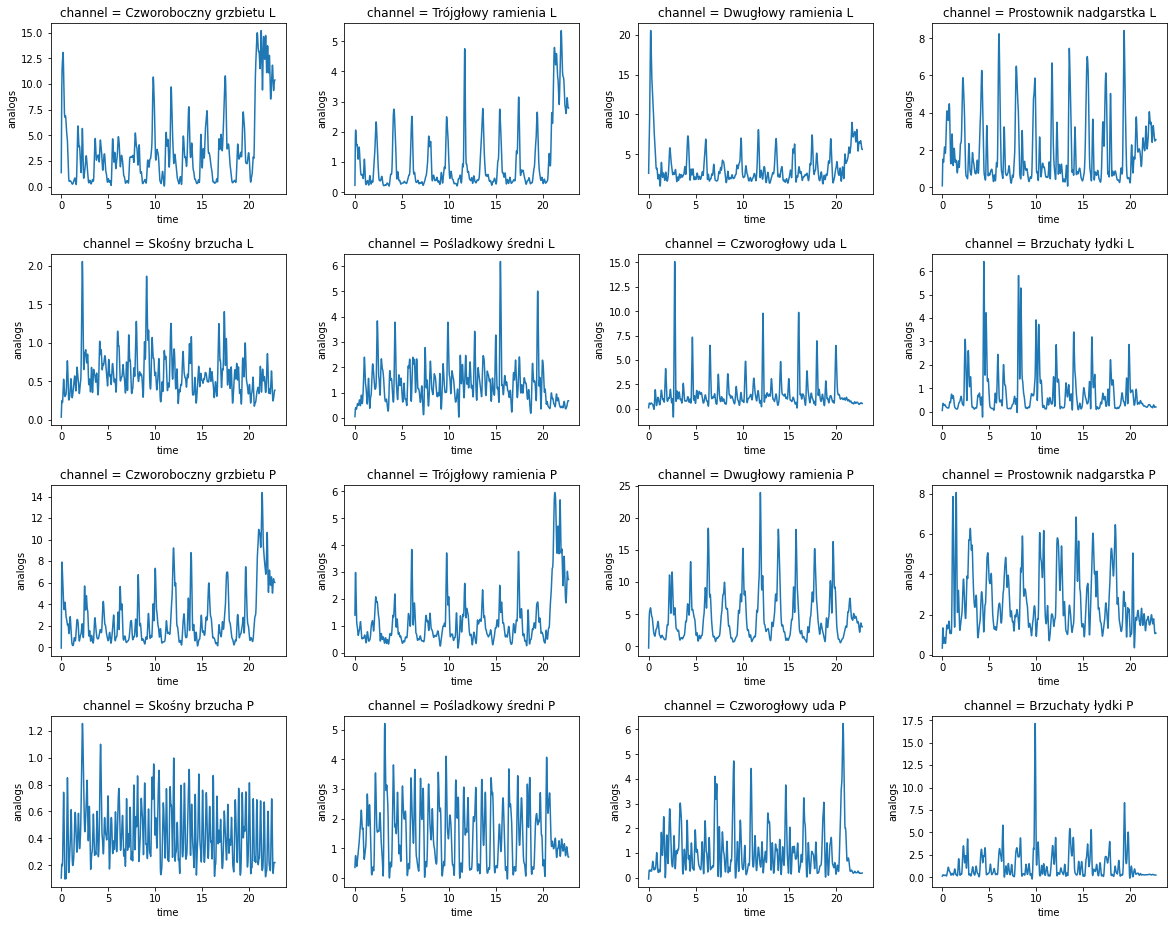

In [25]:
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn import preprocessing
import numpy as np

from matplotlib import scale as mscale



muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]



#print(muscles[0])
emg_list=[]

plt.figure(figsize=(20,15))

for i in range(0,16): 
    emg_list.append(Analogs.from_c3d(data_path, usecols=muscles[i]))
    
    emg_p = (
    emg_list[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(1)
    )
    
    #print(emg_p.indexes)
    emg_p['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    emg_p.plot(x="time")

    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

print(emg_p.shape)
#print(emg_p[1])
#normalized = preprocessing.normalize(a)

In [26]:
import sys

print(emg_p)
print(emg_p[0][0])
print(emg_p.shape[1])

maxi=0
for i in range(emg_p.shape[1]):
    if emg_p[0][i]>maxi:
        maxi=emg_p[0][i]
        
print(maxi)





<xarray.DataArray 'analogs' (channel: 1, time: 22745)>
array([[0.12018831, 0.12291101, 0.12564475, ..., 0.23651028, 0.2365101 ,
        0.23650996]])
Coordinates:
  * channel  (channel) <U17 'Brzuchaty łydki P'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 22.74 22.74 22.74 22.74
<xarray.DataArray 'analogs' ()>
array(0.12018831)
Coordinates:
    channel  <U17 'Brzuchaty łydki P'
    time     float64 0.0
22745
<xarray.DataArray 'analogs' ()>
array(17.13636517)
Coordinates:
    channel  <U17 'Brzuchaty łydki P'
    time     float64 9.886


In [27]:
max(emg_p)

<xarray.DataArray 'analogs' (time: 22745)>
array([0.12018831, 0.12291101, 0.12564475, ..., 0.23651028, 0.2365101 ,
       0.23650996])
Coordinates:
    channel  <U17 'Brzuchaty łydki P'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 22.74 22.74 22.74 22.74

In [31]:
#emg_p[0].shape()

In [32]:
import numpy as np
lenM = np.shape(emg_p[0])

In [37]:
print(lenM)

(22745,)


In [38]:
#print(emg_p[0]['analogs'])

In [39]:
#for frame in lenM:
   # print(emg_p[0][frame])

In [40]:
#print(emg_p[0][0].values)

In [41]:
#print(emg_p[0][0].values)
#print(emg_p[0][1].values)
#print(emg_p[0][2].values)

# Normalizacja wyników

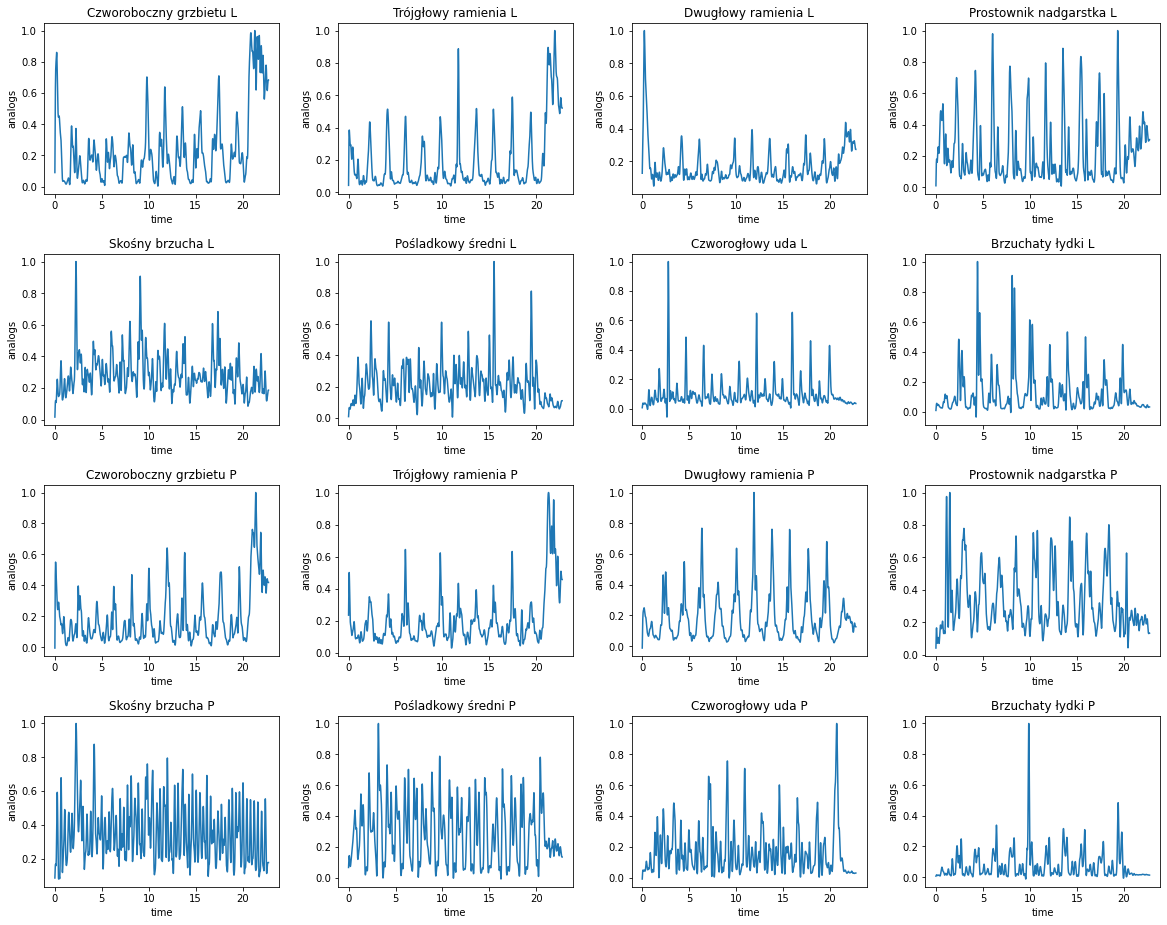

In [42]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale


muscles = [["Voltage.1"],["Voltage.2"],["Voltage.3"],["Voltage.4"],["Voltage.5"],["Voltage.6"],["Voltage.7"],["Voltage.8"],["Voltage.9"],["Voltage.10"],["Voltage.11"],["Voltage.12"],["Voltage.13"],["Voltage.14"],["Voltage.15"],["Voltage.16"]]
muscles_names = [["Czworoboczny grzbietu L"],["Trójgłowy ramienia L"], ["Dwugłowy ramienia L"], ["Prostownik nadgarstka L"],["Skośny brzucha L"], ["Pośladkowy średni L"],["Czworogłowy uda L"], ["Brzuchaty łydki L"],["Czworoboczny grzbietu P"],["Trójgłowy ramienia P"], ["Dwugłowy ramienia P"], ["Prostownik nadgarstka P"],["Skośny brzucha P"], ["Pośladkowy średni P"],["Czworogłowy uda P"], ["Brzuchaty łydki P"]]
muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

max_val=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

emg_list=[]

plt.figure(figsize=(20,15))


for i in range(0,16): 
    emg_norm_value=[]
    emg_list.append(Analogs.from_c3d(data_path, usecols=muscles[i]))
    
    emg_p = (
    emg_list[i].meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(1)
    )
    emg_p['channel'] = muscles_names[i]
    subplot(4, 4, i+1)
    for j in range(emg_p.shape[1]):
        if emg_p[0][j].values>max_val[i]:
            max_val[i]=emg_p[0][j].values
    for k in range(emg_p.shape[1]):
        emg_norm_value.append(emg_p[0][k].values/max_val[i])
    emg_norm=[emg_p.time.values,emg_norm_value]
    
    plt.plot(emg_p.time.values,emg_norm_value)
    plt.xlabel("time")
    plt.ylabel("analogs");
    plt.title(muscles_names2[i])
    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)








In [43]:
print(emg_p)
print(emg_p.time.values)



<xarray.DataArray 'analogs' (channel: 1, time: 22745)>
array([[0.12018831, 0.12291101, 0.12564475, ..., 0.23651028, 0.2365101 ,
        0.23650996]])
Coordinates:
  * channel  (channel) <U17 'Brzuchaty łydki P'
  * time     (time) float64 0.0 0.001 0.002 0.003 ... 22.74 22.74 22.74 22.74
[0.0000e+00 1.0000e-03 2.0000e-03 ... 2.2742e+01 2.2743e+01 2.2744e+01]


Text(0.5, 1.0, "['Brzuchaty łydki P']")

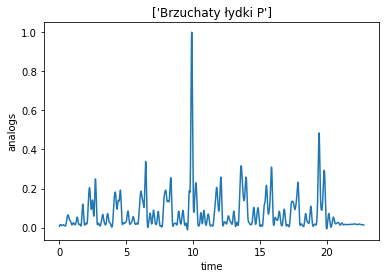

In [45]:
plt.plot(emg_p.time.values,emg_norm_value)
plt.xlabel("time")
plt.ylabel("analogs");
plt.title(muscles_names[i])


# Funkcja odczytująca eventy

In [72]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*200)
    
    return [event, time]

In [73]:
read_labels(data_path)

[['Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike'],
 array([ 351.,  703., 1072., 1450., 1819., 2197., 2579., 2961., 3331.,
        3748., 4056.,  490.,  872., 1246., 1593., 1971., 2366., 2762.,
        3135., 3522., 3926.])]

In [74]:
import data_procesing as dp
import numpy as np
import importlib

In [75]:
importlib.reload(dp)
data_path = r"C:\Users\gmultimedia.PJATK17\Desktop\PjatkM\2020-08-07-B0448-S01-E02-T02.c3d"
eventy = dp.read_labels(data_path)
print(eventy[1])

print(eventy[0][15])
print(eventy[0][:])
eventy[0].index('Foot Strike')


indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
print(indxE)
indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]
print(indxFS)

CzasFS = np.zeros(len(indxFS))
for i in range(len(indxFS)):
    print(indxFS[i])
    CzasFS[i] = eventy[1][indxFS[i]]
print('Czasy Foot Strikeów',CzasFS)

CzasE = np.zeros(len(indxE))
for i in range(len(indxE)):
    print(indxE[i])
    CzasE[i] = eventy[1][indxE[i]]
print('Czasy Eventów:',CzasE)
print(eventy[1])
eventy[1].sort()
print(eventy[1])

[ 351.  703. 1072. 1450. 1819. 2197. 2579. 2961. 3331. 3748. 4056.  490.
  872. 1246. 1593. 1971. 2366. 2762. 3135. 3522. 3926.]
Foot Strike
['Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
11
12
13
14
15
16
17
18
19
20
Czasy Foot Strikeów [ 490.  872. 1246. 1593. 1971. 2366. 2762. 3135. 3522. 3926.]
0
1
2
3
4
5
6
7
8
9
10
Czasy Eventów: [ 351.  703. 1072. 1450. 1819. 2197. 2579. 2961. 3331. 3748. 4056.]
[ 351.  703. 1072. 1450. 1819. 2197. 2579. 2961. 3331. 3748. 4056.  490.
  872. 1246. 1593. 1971. 2366. 2762. 3135. 3522. 3926.]
[ 351.  490.  703.  872. 1072. 1246. 1450. 1593. 1819. 1971. 2197. 2366.
 2579. 2762. 2961. 3135. 3331. 3522. 3748. 3926. 4056.]


In [76]:
p=np.zeros(20)
d=np.zeros(20)
j=0
for i in range(len(eventy[1])):
    if not i == len(eventy[1])-1:
        pierwszy = eventy[1][i]
        drugi = eventy[1][i+1]
        #print('pierwszy', pierwszy)
        #print('drugi', drugi)
        #print('CZASY E',CzasE)
        if pierwszy in CzasE:
            if drugi in CzasFS:
                
                p[j]=pierwszy
                d[j]=drugi
                print('Początek ruchu', pierwszy, 'Koniec ruchu', drugi)
                j+=1
p=p.astype(int)
d=d.astype(int)

Początek ruchu 351.0 Koniec ruchu 490.0
Początek ruchu 703.0 Koniec ruchu 872.0
Początek ruchu 1072.0 Koniec ruchu 1246.0
Początek ruchu 1450.0 Koniec ruchu 1593.0
Początek ruchu 1819.0 Koniec ruchu 1971.0
Początek ruchu 2197.0 Koniec ruchu 2366.0
Początek ruchu 2579.0 Koniec ruchu 2762.0
Początek ruchu 2961.0 Koniec ruchu 3135.0
Początek ruchu 3331.0 Koniec ruchu 3522.0
Początek ruchu 3748.0 Koniec ruchu 3926.0


[ 351  703 1072 1450 1819 2197 2579 2961 3331 3748    0    0    0    0
    0    0    0    0    0    0]


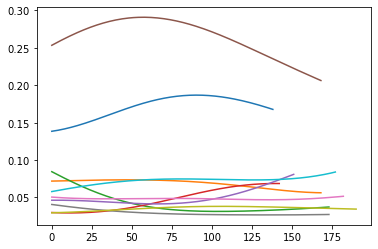

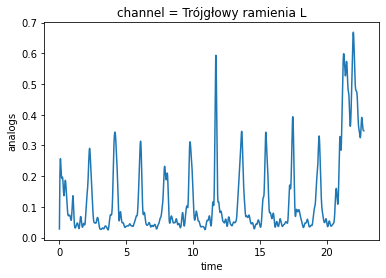

In [77]:
num=1
print(p)
for i in range(10):
         plt.plot(emg_processed[num][p[i]:d[i]])
        
plt.show()
emg_processed[num].plot(x="time")